In [2]:
!pip install yfinance


In [60]:
import yfinance as yf
import pandas as pd
import datetime


In [61]:
# Defining stock ticker for HP Inc.
ticker = "HPQ"

# Taking data from 1980 to till date
start_date = "1980-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

#  historical stock data
hp_stock = yf.download(ticker, start=start_date, end=end_date)

# Resetting index to keep Date as a column as date was an index. It adds another index column 0,1,2...
hp_stock = hp_stock.reset_index()

hp_stock.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,HPQ,HPQ,HPQ,HPQ,HPQ
0,1980-01-02,0.322290,0.330697,0.316685,0.330697,2480333
1,1980-01-03,0.319487,0.322990,0.308977,0.322290,4742227
2,1980-01-04,0.319487,0.322290,0.315984,0.319487,7201421
3,1980-01-07,0.315283,0.320188,0.309678,0.319487,7772179
4,1980-01-08,0.330697,0.330697,0.314583,0.315283,4382861


In [62]:
# Dropping TKR symbol row
hp_stock = hp_stock[1:].reset_index(drop=True)

# Renaming  columns properly
hp_stock.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Converting  Date column (string) to datetime format
hp_stock["Date"] = pd.to_datetime(hp_stock["Date"])

hp_stock.head()


,Date,Close,High,Low,Open,Volume
0,1980-01-03,0.319487,0.322990,0.308977,0.322290,4742227
1,1980-01-04,0.319487,0.322290,0.315984,0.319487,7201421
2,1980-01-07,0.315283,0.320188,0.309678,0.319487,7772179
3,1980-01-08,0.330697,0.330697,0.314583,0.315283,4382861
4,1980-01-09,0.332098,0.339104,0.330697,0.330697,14994739


In [63]:
import pandas as pd
import numpy as np

# Checking for missing values
missing_values = hp_stock.isnull().sum()
print("Missing Values:\n", missing_values)


# Checking for duplicates
duplicate_rows = hp_stock.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Displaying first few rows to confirm changes
hp_stock.head()

# Displaying  the cleaned dataset summary
hp_stock.info()


Missing Values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11383 non-null  datetime64[ns]
 1   Close   11383 non-null  float64       
 2   High    11383 non-null  float64       
 3   Low     11383 non-null  float64       
 4   Open    11383 non-null  float64       
 5   Volume  11383 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 533.7 KB


In [64]:
print(hp_stock.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [66]:
print(hp_stock.columns)
print(len(hp_stock.columns))

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
6


              index                           Date         Close  \
count  11383.000000                          11383  11383.000000   
mean    5691.000000  2002-07-21 13:01:17.483967232      8.810868   
min        0.000000            1980-01-03 00:00:00      0.291938   
25%     2845.500000            1991-04-06 12:00:00      1.359176   
50%     5691.000000            2002-07-18 00:00:00      6.514061   
75%     8536.500000            2013-11-04 12:00:00     12.919691   
max    11382.000000            2025-02-28 00:00:00     38.974937   
std     3286.133391                            NaN      8.492050   

               High           Low          Open        Volume  
count  11383.000000  11383.000000  11383.000000  1.138300e+04  
mean       8.925939      8.695211      8.804694  1.899793e+07  
min        0.302465      0.287728      0.291938  8.209060e+05  
25%        1.377725      1.339583      1.357642  8.582515e+06  
50%        6.590020      6.421814      6.508811  1.367860e+07  
75%

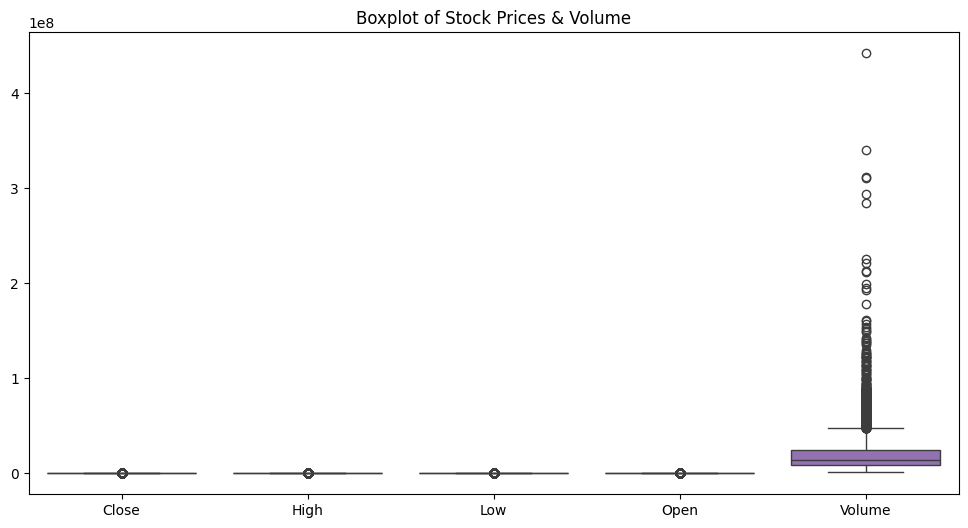

In [29]:
# Summary statistics of numerical columns
print(hp_stock.describe())

# Checking for outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=hp_stock[['Close', 'High', 'Low', 'Open', 'Volume']])
plt.title("Boxplot of Stock Prices & Volume")
plt.show()


Outliers in volume indicate unusual volume on special occassions.

In [67]:
# Find the top 5 days with the highest trading volume
hp_stock.nlargest(5, 'Volume')


,Date,Close,High,Low,Open,Volume
7720,2010-08-09,12.932076,13.308503,12.880470,13.196183,442012304
8296,2012-11-20,3.690411,3.800714,3.576957,3.668351,340591267
7156,2008-05-13,13.207691,13.679075,12.909347,13.243492,312113021
8264,2012-10-03,4.698893,5.467860,4.679983,5.430042,310536610
8359,2013-02-22,6.108732,6.309175,5.761935,5.793751,293423326


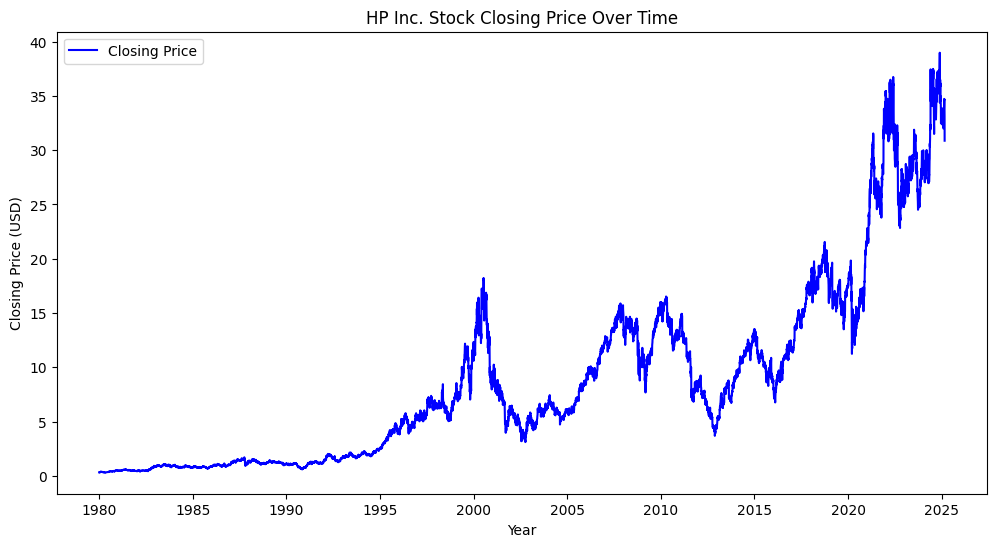

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(hp_stock['Date'], hp_stock['Close'], color='blue', label='Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.title('HP Inc. Stock Closing Price Over Time')
plt.legend()
plt.show()

## Stock price kept appreciating

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = hp_stock.copy()
#Making  a copy of dataframe for each strategy instead of tesing on the original df


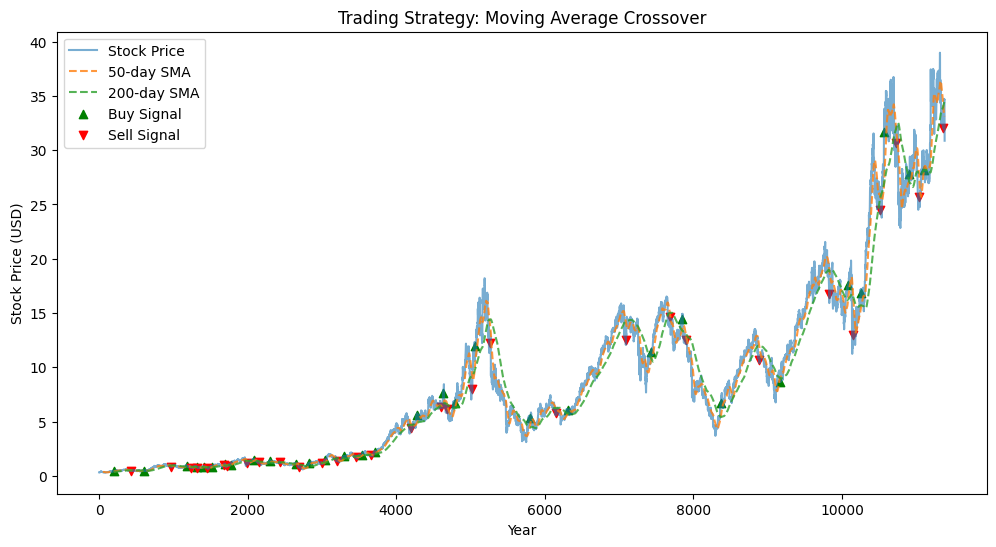

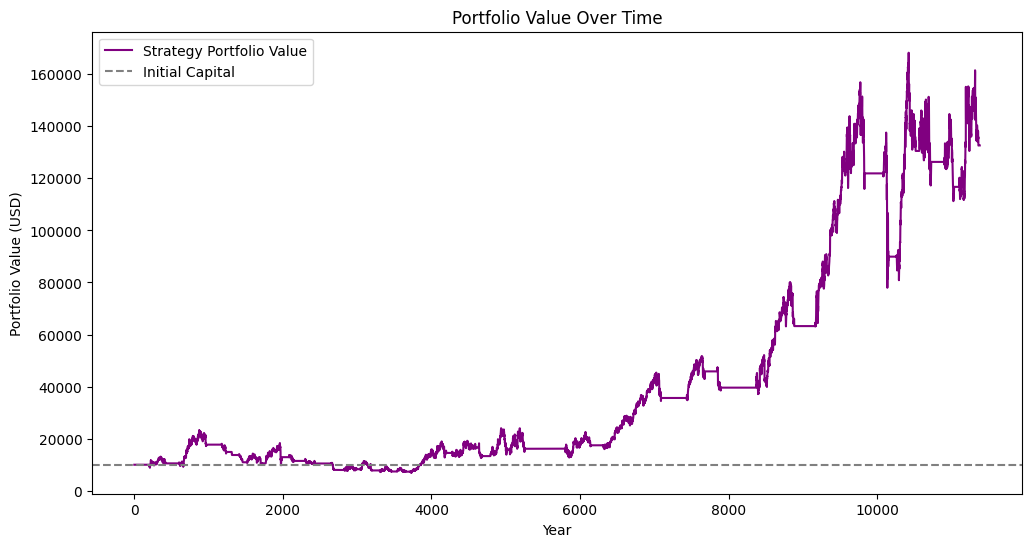

In [72]:
# Computing moving averages
#Simple Moving Average (SMA) is a commonly used technical indicator in trading that calculates the average price of an asset over a specific number of periods. It helps smooth out price fluctuations and identify trends.
#Golden Cross: When a shorter-term SMA (e.g., 50-day) crosses above a longer-term SMA (e.g., 200-day), it signals a bullish trend.
#Death Cross: When a shorter-term SMA crosses below a longer-term SMA, it signals a bearish trend.
# Taking window period of 50 and 200
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Generating Buy/Sell signals. SMA_50>SMA_200 bullish else bearish
df['Signal'] = np.where(df['SMA_50'] > df['SMA_200'], 1, 0)  # 1 for buy, 0 for sell

#  # Detect changes in signal

df['Position'] = df['Signal'].diff()
# Backtesting Strategy on a capital of 1000
initial_capital = 10000
capital = initial_capital
shares = 0
portfolio_value = []

for i in range(len(df)):
    if df['Position'].iloc[i] == 1:  # Buying Signal
        shares = capital // df['Close'].iloc[i]  # Buying  max shares in 10000$
        capital -= shares * df['Close'].iloc[i]
    elif df['Position'].iloc[i] == -1:  # Sell Signal
        capital += shares * df['Close'].iloc[i]  # Sell all the shares
        shares = 0
    portfolio_value.append(capital + shares * df['Close'].iloc[i])

# Convert portfolio value to Series
df['Portfolio_Value'] = portfolio_value

# Plot Performance
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price', alpha=0.6)
plt.plot(df.index, df['SMA_50'], label='50-day SMA', linestyle='--', alpha=0.8)
plt.plot(df.index, df['SMA_200'], label='200-day SMA', linestyle='--', alpha=0.8)
plt.scatter(df.index[df['Position'] == 1], df['Close'][df['Position'] == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Position'] == -1], df['Close'][df['Position'] == -1], marker='v', color='r', label='Sell Signal', alpha=1)
plt.legend()
plt.title('Trading Strategy: Moving Average Crossover')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.show()

# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Portfolio_Value'], label='Strategy Portfolio Value', color='purple')
plt.axhline(y=initial_capital, color='gray', linestyle='--', label='Initial Capital')
plt.legend()
plt.title('Portfolio Value Over Time')
plt.xlabel('Year')
plt.ylabel('Portfolio Value (USD)')
plt.show()


Portfoli value increased

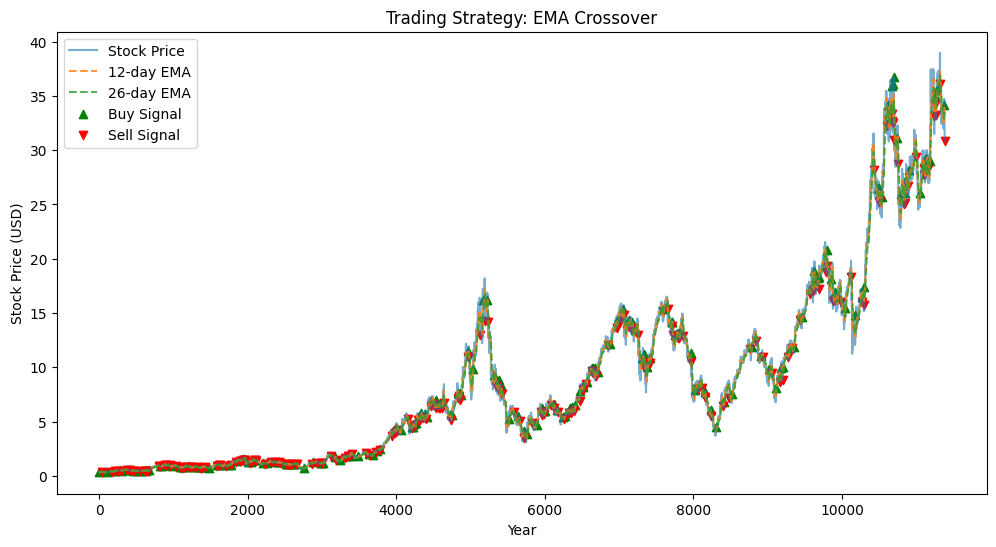

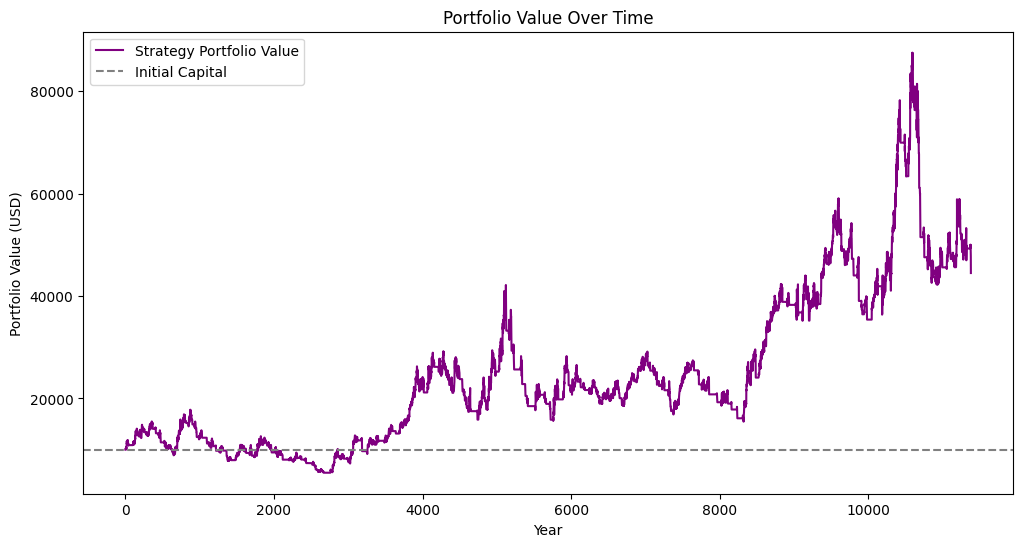

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = hp_stock.copy()

# Computing EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Generating Buy/Sell signals
df['Signal'] = np.where(df['EMA_12'] > df['EMA_26'], 1, 0)  # 1 for buy, 0 for sell
df['Position'] = df['Signal'].diff()  # Detect changes in signal

# Backtesting Strategy
initial_capital = 10000
capital = initial_capital
shares = 0
portfolio_value = []

for i in range(len(df)):
    if df['Position'].iloc[i] == 1:  # Buy Signal
        shares = capital // df['Close'].iloc[i]  # Buy max shares
        capital -= shares * df['Close'].iloc[i]
    elif df['Position'].iloc[i] == -1:  # Sell Signal
        capital += shares * df['Close'].iloc[i]  # Sell all shares
        shares = 0
    portfolio_value.append(capital + shares * df['Close'].iloc[i])

# Convert portfolio value to Series
df['Portfolio_Value'] = portfolio_value

# Plot Performance
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price', alpha=0.6)
plt.plot(df.index, df['EMA_12'], label='12-day EMA', linestyle='--', alpha=0.8)
plt.plot(df.index, df['EMA_26'], label='26-day EMA', linestyle='--', alpha=0.8)
plt.scatter(df.index[df['Position'] == 1], df['Close'][df['Position'] == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Position'] == -1], df['Close'][df['Position'] == -1], marker='v', color='r', label='Sell Signal', alpha=1)
plt.legend()
plt.title('Trading Strategy: EMA Crossover')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.show()

# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Portfolio_Value'], label='Strategy Portfolio Value', color='purple')
plt.axhline(y=initial_capital, color='gray', linestyle='--', label='Initial Capital')
plt.legend()
plt.title('Portfolio Value Over Time')
plt.xlabel('Year')
plt.ylabel('Portfolio Value (USD)')
plt.show()


Here SMA did better than EMA

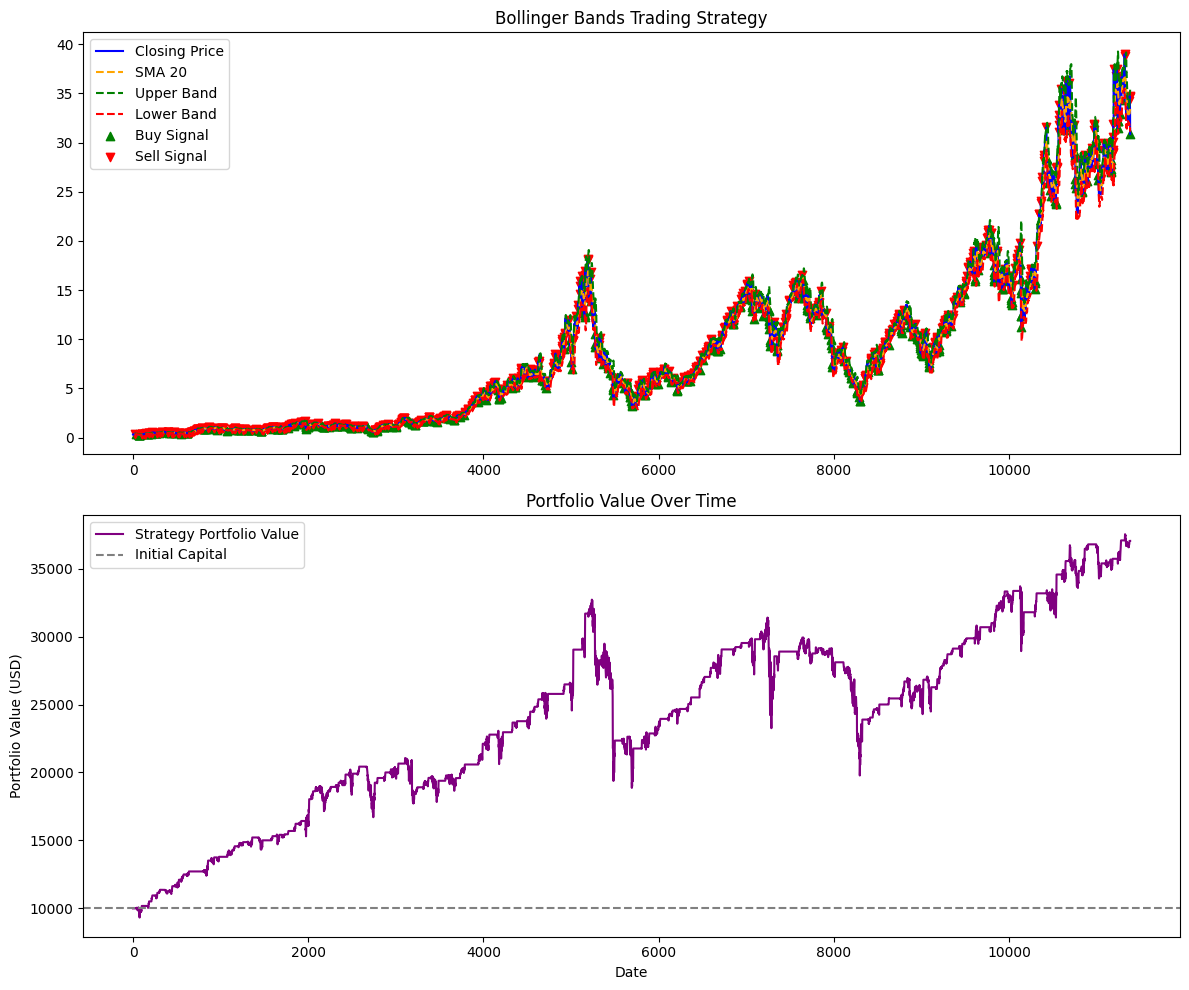

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy dataset
df = hp_stock.copy(deep=True)

# Bollinger Bands Calculation
window = 20
df['SMA_20'] = df['Close'].rolling(window=window).mean()
df['STD_20'] = df['Close'].rolling(window=window).std()

# Upper and Lower Bands
df['Upper_Band'] = df['SMA_20'] + (df['STD_20'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['STD_20'] * 2)

# Identify Buy & Sell Signals
df['Buy_Signal'] = df['Close'] < df['Lower_Band']
df['Sell_Signal'] = df['Close'] > df['Upper_Band']

# Initialize Portfolio Variables
initial_capital = 10000
capital = initial_capital
shares = 0
portfolio_values = []
cooldown = 5  # Prevents immediate buy/sell flipping
cooldown_counter = 0

for i in range(len(df)):
    price = df['Close'].iloc[i]

    if df['Buy_Signal'].iloc[i] and capital > price and cooldown_counter == 0:
        buy_amount = capital * 0.2  # Only use 20% of capital per trade because porfolio value is getting worse if 100% is used
        shares_to_buy = buy_amount // price
        capital -= shares_to_buy * price
        shares += shares_to_buy
        cooldown_counter = cooldown  # Wait before next trade

    elif df['Sell_Signal'].iloc[i] and shares > 0 and cooldown_counter == 0:
        capital += shares * price
        shares = 0
        cooldown_counter = cooldown

    # Reduce cooldown counter
    cooldown_counter = max(0, cooldown_counter - 1)

    # Portfolio Value Calculation
    portfolio_values.append(capital + (shares * price))

df['Portfolio_Value'] = portfolio_values

# Plotting
plt.figure(figsize=(12, 10))

# First Plot: Bollinger Bands
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange', linestyle="--")
plt.plot(df.index, df['Upper_Band'], label='Upper Band', color='green', linestyle="--")
plt.plot(df.index, df['Lower_Band'], label='Lower Band', color='red', linestyle="--")

# Buy and Sell Signals
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title("Bollinger Bands Trading Strategy")
plt.legend()

# Second Plot: Portfolio Value Over Time
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Portfolio_Value'], label="Strategy Portfolio Value", color="purple")
plt.axhline(y=initial_capital, color="gray", linestyle="--", label="Initial Capital")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()

plt.tight_layout()
plt.show()


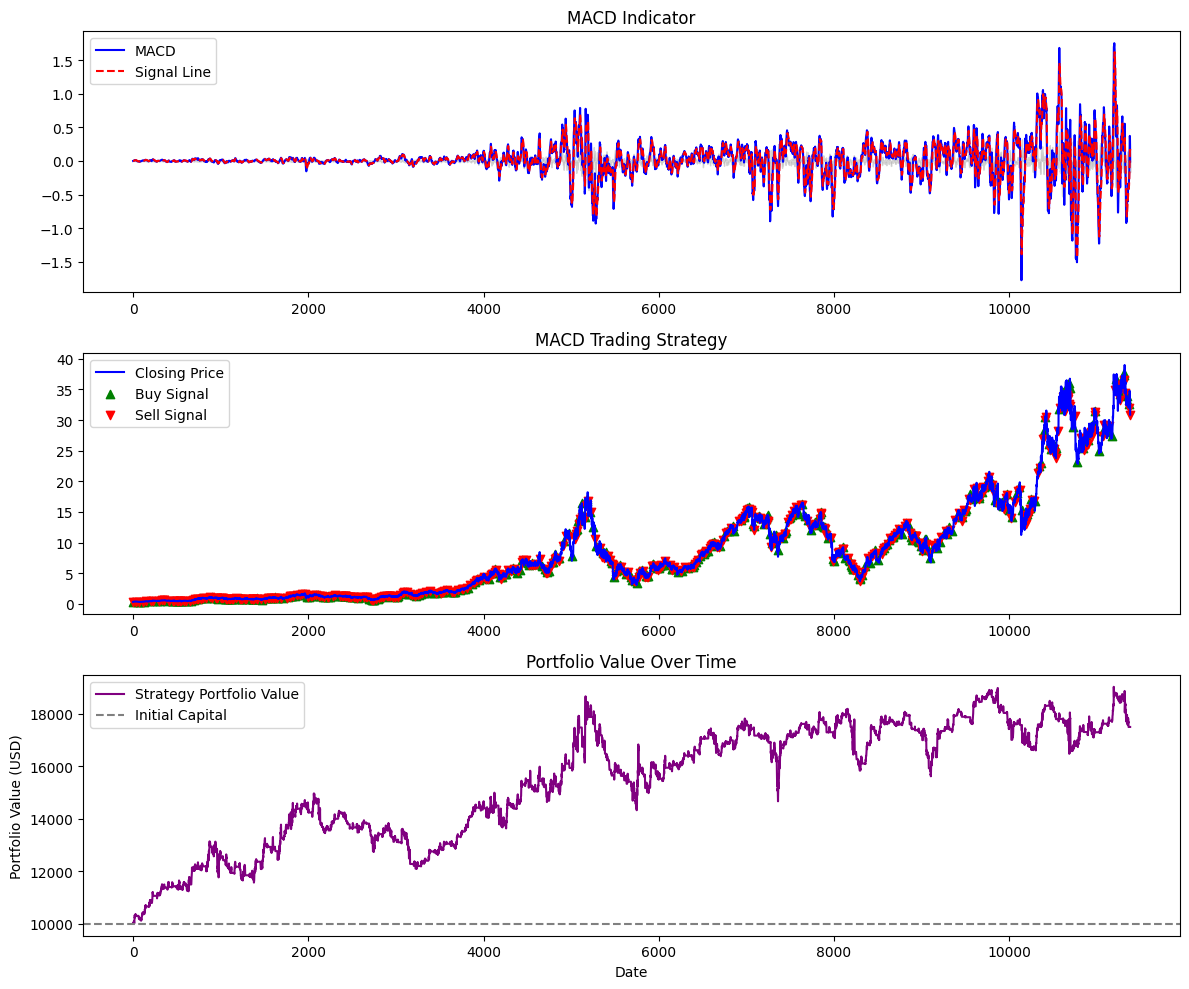

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy dataset
df = hp_stock.copy(deep=True)

# MACD Calculation
short_window = 12  # Fast EMA period
long_window = 26   # Slow EMA period
signal_window = 9  # Signal line period

df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# Identifying Buy & Sell Signals
df['Buy_Signal'] = (df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1))
df['Sell_Signal'] = (df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1))

# Initialize Portfolio Variables
initial_capital = 10000
capital = initial_capital
shares = 0
portfolio_values = []
cooldown = 5  # Prevents immediate buy/sell flipping
cooldown_counter = 0

for i in range(len(df)):
    price = df['Close'].iloc[i]

    if df['Buy_Signal'].iloc[i] and capital > price and cooldown_counter == 0:
        buy_amount = capital * 0.2  # Only use 20% of capital per trade
        shares_to_buy = buy_amount // price
        capital -= shares_to_buy * price
        shares += shares_to_buy
        cooldown_counter = cooldown  # Wait before next trade

    elif df['Sell_Signal'].iloc[i] and shares > 0 and cooldown_counter == 0:
        capital += shares * price
        shares = 0
        cooldown_counter = cooldown

    # Reduce cooldown counter
    cooldown_counter = max(0, cooldown_counter - 1)

    # Portfolio Value Calculation
    portfolio_values.append(capital + (shares * price))

df['Portfolio_Value'] = portfolio_values

# Plotting
plt.figure(figsize=(12, 10))

# First Plot: MACD Indicator
plt.subplot(3, 1, 1)
plt.plot(df.index, df['MACD'], label="MACD", color='blue')
plt.plot(df.index, df['Signal_Line'], label="Signal Line", color='red', linestyle="--")
plt.fill_between(df.index, df['MACD'] - df['Signal_Line'], color='gray', alpha=0.3)
plt.title("MACD Indicator")
plt.legend()

# Second Plot: Price with Buy/Sell Signals
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title("MACD Trading Strategy")
plt.legend()

# Third Plot: Portfolio Value Over Time
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Portfolio_Value'], label="Strategy Portfolio Value", color="purple")
plt.axhline(y=initial_capital, color="gray", linestyle="--", label="Initial Capital")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()

plt.tight_layout()
plt.show()


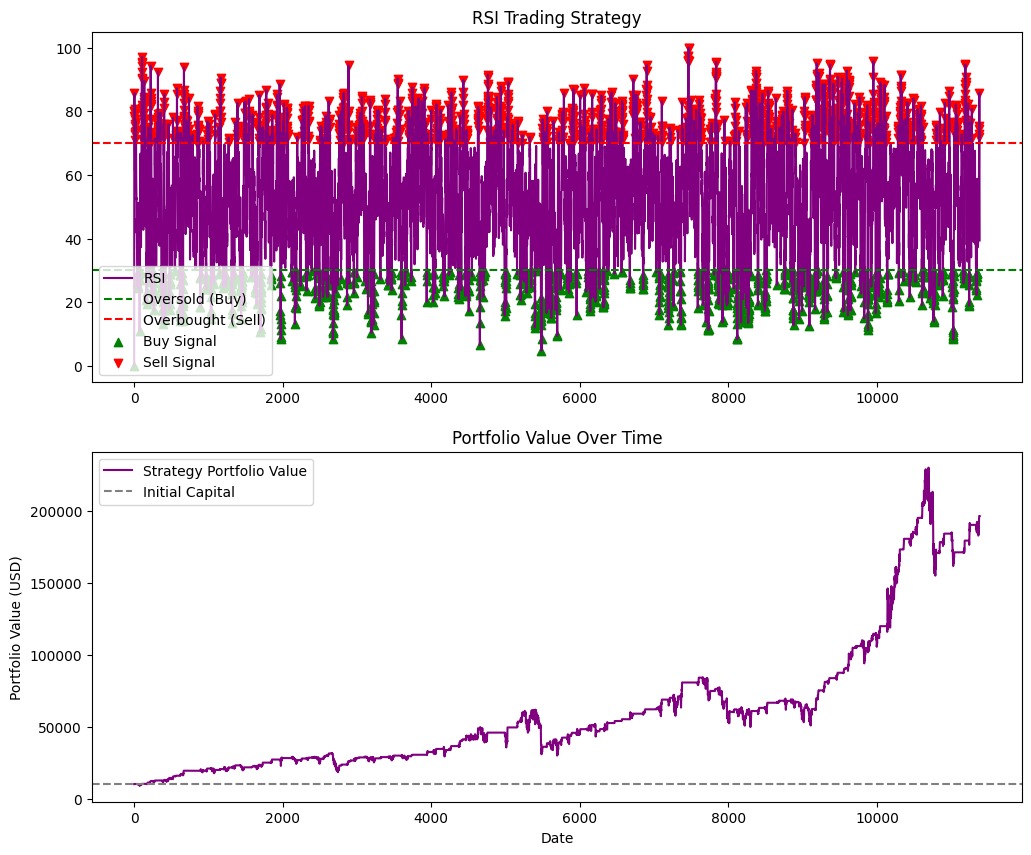

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy dataset
df = hp_stock.copy()

# RSI Calculation
window = 14  # RSI period
delta = df['Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Define Buy & Sell signals
df['Buy_Signal'] = df['RSI'] < 30
df['Sell_Signal'] = df['RSI'] > 70

# Portfolio Simulation
initial_capital = 10000
capital = initial_capital
position = 0  # Number of shares held
portfolio_values = []  # Store portfolio value over time
investment_fraction = 0.2  # Invest only 20% of capital per trade

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i] and capital > 0:  # Buy with fraction of capital
        buy_amount = capital * investment_fraction
        position += buy_amount / df['Close'].iloc[i]
        capital -= buy_amount

    elif df['Sell_Signal'].iloc[i] and position > 0:  # Sell
        capital += position * df['Close'].iloc[i]
        position = 0

    # Track portfolio value
    portfolio_value = capital + (position * df['Close'].iloc[i])
    portfolio_values.append(portfolio_value)

df['Portfolio_Value'] = portfolio_values

# Plot RSI Strategy
plt.figure(figsize=(12, 10))

# RSI Plot
plt.subplot(2, 1, 1)
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(30, linestyle='--', color='green', label='Oversold (Buy)')
plt.axhline(70, linestyle='--', color='red', label='Overbought (Sell)')
plt.scatter(df.index[df['Buy_Signal']], df['RSI'][df['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Sell_Signal']], df['RSI'][df['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title("RSI Trading Strategy")
plt.legend()

# Portfolio Value Plot
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Portfolio_Value'], label='Strategy Portfolio Value', color='purple')
plt.axhline(initial_capital, linestyle='--', color='gray', label='Initial Capital')
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.title("Portfolio Value Over Time")
plt.legend()

plt.show()


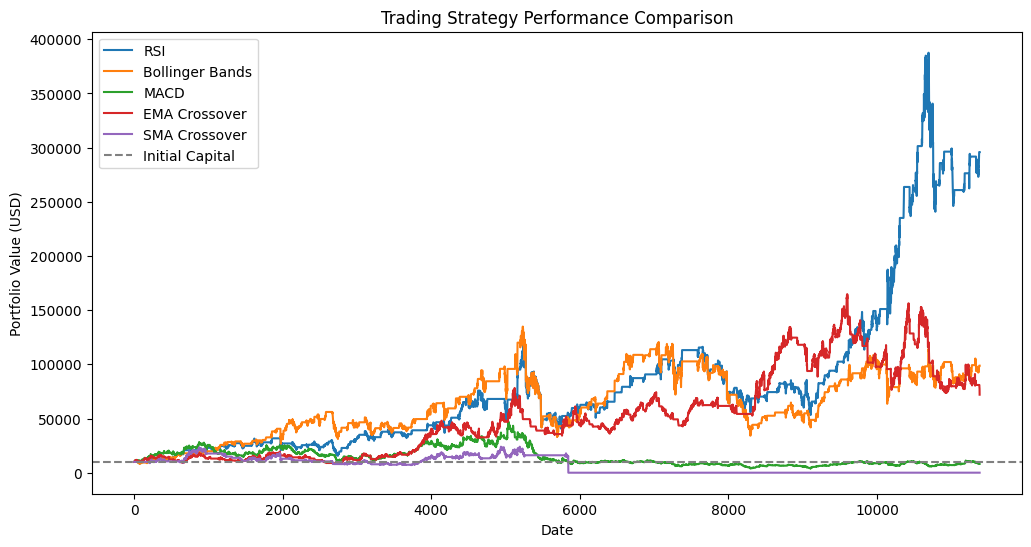

                 Final Portfolio Value  Sharpe Ratio  Max Drawdown
RSI                      295888.370454     -0.575298     -0.705054
Bollinger Bands           98789.341749     -0.579737     -0.755275
MACD                       8142.570780     -0.607483     -0.918257
EMA Crossover             71999.001609     -0.598518     -0.591670
SMA Crossover                37.040132     -0.519584     -0.999819

🔹 Best Strategy Based on Risk-Adjusted Returns: RSI


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.01):
    if returns.std() == 0:
        return np.nan  # Avoid division by zero
    return (returns.mean() - risk_free_rate) / returns.std()

# Function to calculate Maximum Drawdown
def max_drawdown(portfolio_values):
    rolling_max = portfolio_values.cummax()
    drawdown = (portfolio_values - rolling_max) / rolling_max
    return drawdown.min()

# Simple Moving Average (SMA) Strategy
def sma_strategy(data, short_window=50, long_window=200):
    df = data.copy()
    df['SMA_Short'] = df['Close'].rolling(window=short_window).mean()
    df['SMA_Long'] = df['Close'].rolling(window=long_window).mean()

    df['Buy_Signal'] = (df['SMA_Short'] > df['SMA_Long'])
    df['Sell_Signal'] = (df['SMA_Short'] < df['SMA_Long'])

    # Portfolio Initialization
    initial_capital = 10000
    capital = initial_capital
    shares = 0
    portfolio_values = []

    for i in range(len(df)):
        price = df['Close'].iloc[i]

        if df['Buy_Signal'].iloc[i] and capital > price:
            shares = capital // price
            capital -= shares * price

        elif df['Sell_Signal'].iloc[i] and shares > 0:
            capital += shares * price
            shares = 0

        portfolio_values.append(capital + (shares * price))

    df['Portfolio_Value'] = portfolio_values
    return df['Portfolio_Value']

# Function to run all strategies
def run_strategies(data):
    strategies = {
        "RSI": rsi_strategy(data.copy()),
        "Bollinger Bands": bollinger_strategy(data.copy()),
        "MACD": macd_strategy(data.copy()),
        "EMA Crossover": ema_crossover_strategy(data.copy()),
        "SMA Crossover": sma_strategy(data.copy()),
    }

    results = {}
    for name, portfolio in strategies.items():
        returns = portfolio.pct_change().dropna()
        results[name] = {
            "Final Portfolio Value": portfolio.iloc[-1],
            "Sharpe Ratio": sharpe_ratio(returns),
            "Max Drawdown": max_drawdown(portfolio)
        }

    return strategies, results

# Run strategies using existing hp_stock data
strategies, results = run_strategies(hp_stock.copy())

# -------------------- Portfolio Comparison Plot --------------------
plt.figure(figsize=(12,6))
for name, portfolio in strategies.items():
    plt.plot(portfolio, label=name)

plt.axhline(y=10000, color='gray', linestyle='--', label="Initial Capital")
plt.title("Trading Strategy Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()

# -------------------- Print Performance Metrics --------------------
results_df = pd.DataFrame(results).T
print(results_df)

# Identify best strategy while ignoring failures
valid_strategies = results_df[results_df["Final Portfolio Value"] > 10000]

if not valid_strategies.empty:
    best_strategy = valid_strategies["Sharpe Ratio"].idxmax()
else:
    best_strategy = "No valid strategy"

print(f"\n🔹 Best Strategy Based on Risk-Adjusted Returns: {best_strategy}")
